In [1]:
import numpy as np
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

In [2]:
df_over = pd.read_csv('./csv/preprocessed/data_preprocessed_over.csv')
df_under = pd.read_csv('./csv/preprocessed/data_preprocessed_under.csv')
df = pd.read_csv('./csv/preprocessed/data_preprocessed.csv')

In [3]:
df_x = df.loc[:,df.columns != '식전혈당']
df['식전혈당'] = df['식전혈당'].apply(lambda x: 0 if x <=1 else 1)
df_under['식전혈당'] = df_under['식전혈당'].apply(lambda x: 0 if x <=1 else 1)
df_over_x = df_over.loc[:,df.columns != '식전혈당']
df_under_x = df_under.loc[:,df.columns != '식전혈당']

In [4]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model_over = DecisionTreeRegressor()
model_under = DecisionTreeRegressor()

model.fit(df_x, df['식전혈당'])
model_over.fit(df_over_x, df_over['식전혈당'])
model_under.fit(df_under_x, df_under['식전혈당'])

DecisionTreeRegressor()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


Feature: 성별코드, Score: 0.00700
Feature: 연령대코드, Score: 0.05618
Feature: 허리둘레, Score: 0.07736
Feature: 총콜레스테롤, Score: 0.09093
Feature: 트리글리세라이드, Score: 0.10713
Feature: HDL콜레스테롤, Score: 0.08219
Feature: LDL콜레스테롤, Score: 0.08941
Feature: 혈색소, Score: 0.09559
Feature: 요단백, Score: 0.01535
Feature: 혈청크레아티닌, Score: 0.05427
Feature: AST, Score: 0.07356
Feature: ALT, Score: 0.07974
Feature: 감마지티피, Score: 0.10117
Feature: 흡연상태, Score: 0.01749
Feature: 음주여부, Score: 0.01001
Feature: 복부비만, Score: 0.00467
Feature: 비만여부, Score: 0.01437
Feature: 고혈압, Score: 0.02358


C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47161 missing from c

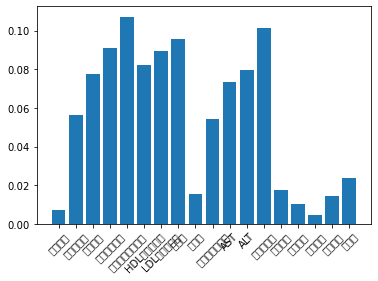

In [5]:
from matplotlib import pyplot
import matplotlib.font_manager as fm
pyplot.rc('font', family='NanumGothic')



importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (df_x.columns[i],v))
# plot feature importance
pyplot.bar([df_x.columns[x] for x in range(len(importance))], importance)
pyplot.xticks(rotation=45)
pyplot.show()

Feature: 성별코드, Score: 0.00000
Feature: 연령대코드, Score: 0.00000
Feature: 허리둘레, Score: 0.00000
Feature: 트리글리세라이드, Score: 0.00000
Feature: HDL콜레스테롤, Score: 0.00000
Feature: LDL콜레스테롤, Score: 0.00000
Feature: 혈색소, Score: 0.00000
Feature: 요단백, Score: 0.00000
Feature: 혈청크레아티닌, Score: 0.00000
Feature: AST, Score: 0.00000
Feature: ALT, Score: 0.00000
Feature: 감마지티피, Score: 0.00000
Feature: 흡연상태, Score: 0.00000
Feature: 음주여부, Score: 0.00000
Feature: 복부비만, Score: 0.00000
Feature: 비만여부, Score: 0.00000
Feature: 고혈압, Score: 0.00000
Feature: 식전혈당, Score: 1.00000


C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45817 missing from curre

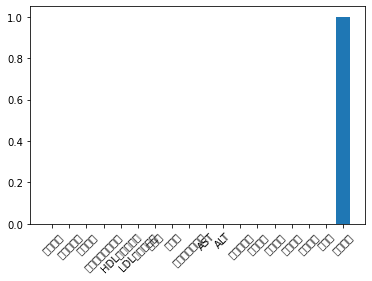

In [6]:
from matplotlib import pyplot
import matplotlib.font_manager as fm
pyplot.rc('font', family='NanumGothic')



importance_over = model_over.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_over):
	print('Feature: %0s, Score: %.5f' % (df_over_x.columns[i],v))
# plot feature importance
pyplot.bar([df_over_x.columns[x] for x in range(len(importance_over))], importance_over)
pyplot.xticks(rotation=45)
pyplot.show()

Feature: 성별코드, Score: 0.00744
Feature: 연령대코드, Score: 0.09157
Feature: 허리둘레, Score: 0.07489
Feature: 총콜레스테롤, Score: 0.08891
Feature: 트리글리세라이드, Score: 0.10395
Feature: HDL콜레스테롤, Score: 0.07583
Feature: LDL콜레스테롤, Score: 0.08211
Feature: 혈색소, Score: 0.08520
Feature: 요단백, Score: 0.01427
Feature: 혈청크레아티닌, Score: 0.04676
Feature: AST, Score: 0.07069
Feature: ALT, Score: 0.07514
Feature: 감마지티피, Score: 0.11316
Feature: 흡연상태, Score: 0.01546
Feature: 음주여부, Score: 0.01273
Feature: 복부비만, Score: 0.00633
Feature: 비만여부, Score: 0.01307
Feature: 고혈압, Score: 0.02250


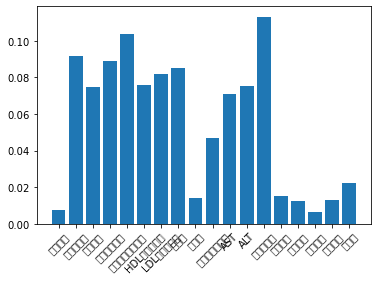

In [6]:
from matplotlib import pyplot
import matplotlib.font_manager as fm
pyplot.rc('font', family='NanumGothic')



importance_under = model_under.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_under):
	print('Feature: %0s, Score: %.5f' % (df_under_x.columns[i],v))
# plot feature importance
pyplot.bar([df_under_x.columns[x] for x in range(len(importance_under))], importance_under)
pyplot.xticks(rotation=45)
pyplot.show()

In [13]:
f = []
f_under = []
for i in range(len(importance)):
    f.append((df_x.columns[i],importance[i]))

for i in range(len(importance_under)):
    f_under.append((df_under_x.columns[i],importance_under[i]))

new_list = sorted(f, key=lambda x: x[1],reverse=True)
new_list_under = sorted(f_under, key=lambda x: x[1],reverse=True)
important_features = list(map(lambda x: x[0],new_list))[:5]
important_under_features = list(map(lambda x: x[0],new_list_under))[:5]

print(important_features)
print(important_under_features)


['트리글리세라이드', '감마지티피', '혈색소', '총콜레스테롤', 'LDL콜레스테롤']
['감마지티피', '트리글리세라이드', '연령대코드', '총콜레스테롤', '혈색소']


In [15]:
df_features = df_under_x[important_under_features]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features.values, df_under["식전혈당"].values, test_size=0.2, random_state = 11)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    df_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    df_clf.fit(X_train, y_train)
    pred = df_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))
    print(confusion_matrix(y_test,pred))

max_depth = 6 정확도: 0.7035
[[83231 10786]
 [30897 15689]]
max_depth = 8 정확도: 0.7067
[[82214 11803]
 [29436 17150]]
max_depth = 10 정확도: 0.7059
[[80865 13152]
 [28196 18390]]
max_depth = 12 정확도: 0.7026
[[80267 13750]
 [28062 18524]]
max_depth = 16 정확도: 0.6882
[[77878 16139]
 [27698 18888]]
max_depth = 20 정확도: 0.6647
[[74003 20014]
 [27125 19461]]
max_depth = 24 정확도: 0.6430
[[70037 23980]
 [26209 20377]]


In [17]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

dt_clf = DecisionTreeClassifier(random_state=33)
parameters = {'max_depth': [3, 5, 7,9,11,None],
              'max_features': ['sqrt',None,'log2'],
              'min_samples_split': [3, 5],
              'splitter': ['best', 'random'],
              'max_leaf_nodes':[3,5,7,9,11,None]
             }

grid_dt = GridSearchCV(dt_clf, # estimator 객체,
                      param_grid = parameters, cv = 5
#                       n_jobs = -1
                      )

grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,max_features,max_leaf_nodes,min_samples_split,splitter,mean_test_score
260,9.0,None,NaN,3,best,0.704357
262,9.0,None,NaN,5,best,0.704357
190,7.0,None,NaN,5,best,0.703052
188,7.0,None,NaN,3,best,0.703052
332,11.0,None,NaN,3,best,0.702542
...,...,...,...,...,...,...
405,NaN,None,NaN,3,random,0.637957
380,NaN,sqrt,NaN,3,best,0.637404
428,NaN,log2,NaN,3,best,0.637404
406,NaN,None,NaN,5,best,0.632962


In [18]:
# 교차검증
# df_clf = DecisionTreeClassifier(random_state=33, max_depth=30, max_features='sqrt', min_samples_split=5, splitter='best ')
df_clf = DecisionTreeClassifier(random_state=11,max_depth=9, max_features=None, min_samples_split=5)

from sklearn.model_selection import cross_val_score, cross_validate

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, df_features.values, df_under["식전혈당"].values, cv = 5)
scores

pd.DataFrame(cross_validate(dt_clf, df_features.values, df_under["식전혈당"].values, cv =5))
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.6239248037328048


In [20]:
df_clf = DecisionTreeClassifier(random_state=11,max_depth=9, max_features=None, min_samples_split=5)
# df_clf = DecisionTreeClassifier(random_state=11)
df_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('정확도: {0:.4f}'.format(accuracy))
print(confusion_matrix(y_test,pred))

정확도: 0.7064
[[81099 12918]
 [28368 18218]]


In [30]:
from sklearn.tree import export_graphviz

export_graphviz(df_clf, out_file="tree.dot", feature_names=important_under_features)

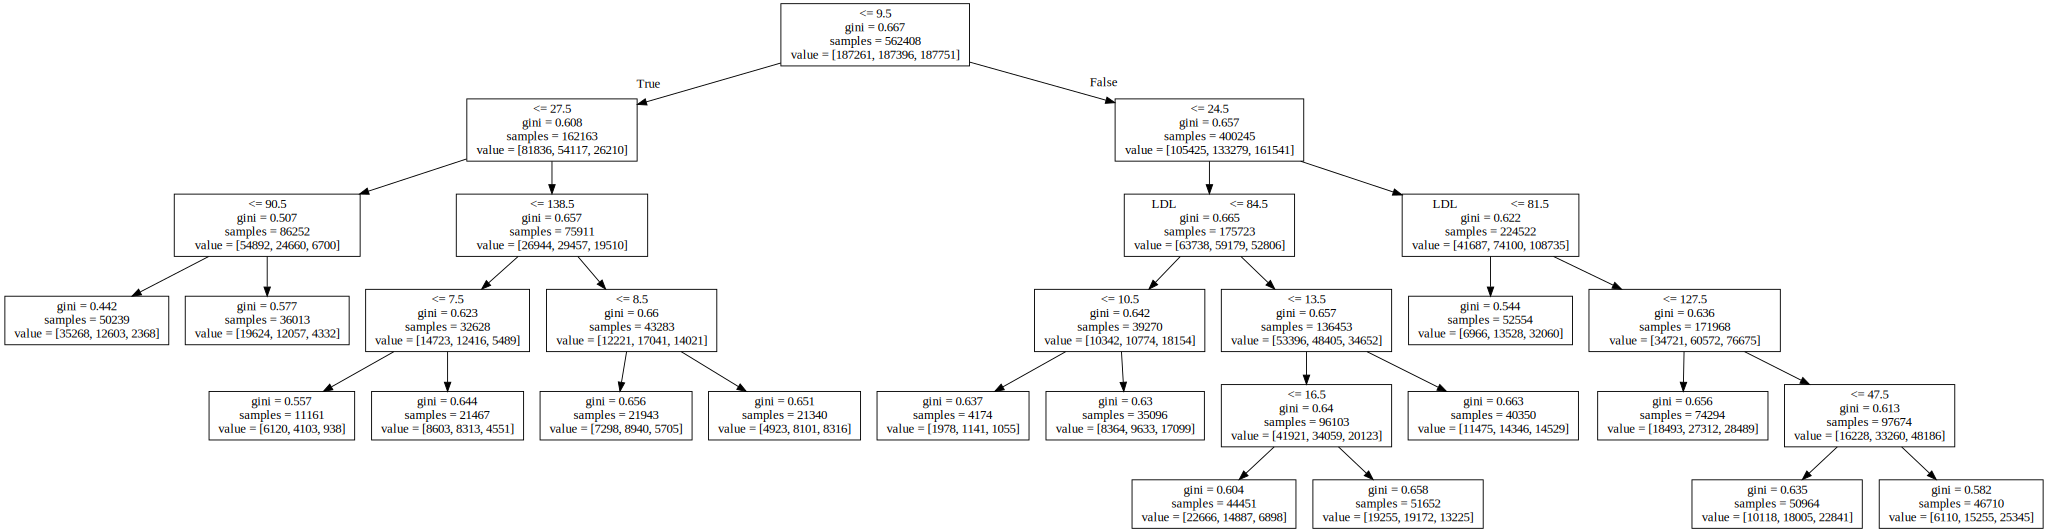

In [32]:
import graphviz

with open("tree.dot",encoding='UTF8') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)
